Model architectures

In [25]:
import torch.nn as nn
import torch
import torch.nn.functional as F

class MonoCnnAudioNet(nn.Module):
    def __init__(self,numClasses):
        super(MonoCnnAudioNet,self).__init__()
        self.num_classes = numClasses
        self.fc_features = 128
        self.C1 = nn.Conv2d(1,32,3,padding=1)
        self.C11 = nn.Conv2d(32,32,3,padding=1)
        self.C2 = nn.Conv2d(32,64,3,padding=1)
        self.C22 = nn.Conv2d(64,64,3,padding=1)
        self.C3 = nn.Conv2d(64,128,3,padding=1)
        self.C33 = nn.Conv2d(128,128,3,padding=1)
        
        self.BN1 = nn.BatchNorm2d(32)
        self.BN11 = nn.BatchNorm2d(32)
        self.BN2 = nn.BatchNorm2d(64)
        self.BN22 = nn.BatchNorm2d(64)
        self.BN3 = nn.BatchNorm2d(128)
        self.BN33 = nn.BatchNorm2d(128)
        self.BNFC = nn.BatchNorm1d(self.fc_features)
        self.maxpool1 = nn.MaxPool2d(2,2)
        self.maxpool2 = nn.MaxPool2d((2,2),(2,2))
        self.softmax = nn.Softmax(dim=1)
        
        
        self.fc1 = nn.Linear(64*32*32,self.fc_features)
        self.fc2 = nn.Linear(self.fc_features + 1,self.num_classes) 
        self.dropout = nn.Dropout(0.5)
        
    def forward(self,x,timestamp):
        # add sequence of convolutional and max pooling layers
        x = self.maxpool1(F.relu(self.BN1(self.C1(x))))
        #x = self.maxpool1(F.relu(self.BN11(self.C11(x))))
        x = self.maxpool1(F.relu(self.BN2(self.C2(x))))
        #x = self.maxpool1(F.relu(self.BN22(self.C22(x))))
        #x = F.relu(self.BN3(self.C3(x)))
        #x = self.maxpool1(F.relu(self.BN33(self.C33(x))))
        # flatten image input
        x = x.view(-1,64*32*32)
        x =  self.BNFC(self.fc1(x))
        x = self.dropout(x)
        x = torch.cat((x, timestamp/240), 1) #normalize timestamp
        x = self.fc2(x)
        #x = self.softmax(x) #already included in CrossEntropyLoss
        return x
        
class EncodedCnnAudioNet(nn.Module):
    def __init__(self,numClasses):
        super(EncodedCnnAudioNet,self).__init__()
        self.num_classes = numClasses
        self.fc_features = 128
        self.C1 = nn.Conv2d(3,32,3,padding=1)
        self.C11 = nn.Conv2d(32,32,3,padding=1)
        self.C2 = nn.Conv2d(32,64,3,padding=1)
        self.C22 = nn.Conv2d(64,64,3,padding=1)
        self.C3 = nn.Conv2d(64,128,3,padding=1)
        self.C33 = nn.Conv2d(128,128,3,padding=1)
        
        self.BN1 = nn.BatchNorm2d(32)
        self.BN11 = nn.BatchNorm2d(32)
        self.BN2 = nn.BatchNorm2d(64)
        self.BN22 = nn.BatchNorm2d(64)
        self.BN3 = nn.BatchNorm2d(128)
        self.BN33 = nn.BatchNorm2d(128)

        self.BNFC = nn.BatchNorm1d(self.fc_features)
        self.maxpool1 = nn.MaxPool2d(2,2)
        self.maxpool2 = nn.MaxPool2d((2,2),(2,2))
        self.softmax = nn.Softmax(dim=1)
        
        
        self.fc1 = nn.Linear(64*32*32,self.fc_features)
        self.fc2 = nn.Linear(self.fc_features + 1,self.num_classes) 
        self.dropout = nn.Dropout(0.5)
        
    def forward(self,x,timestamp):
        # add sequence of convolutional and max pooling layers
        x = self.maxpool1(F.relu(self.BN1(self.C1(x))))
        #x = self.maxpool1(F.relu(self.BN11(self.C11(x))))
        x = self.maxpool1(F.relu(self.BN2(self.C2(x))))
        #x = self.maxpool1(F.relu(self.BN22(self.C22(x))))
        #x = F.relu(self.BN3(self.C3(x)))
        #x = self.maxpool1(F.relu(self.BN33(self.C33(x))))
        # flatten image input
        x = x.view(-1,64*32*32)
        x =  self.BNFC(self.fc1(x))
        x = self.dropout(x)
        x = torch.cat((x, timestamp/240), 1) #normalize timestamp between 0 and 1
        x = self.fc2(x)
        #x = self.softmax(x) #already included in CrossEntropyLoss
        return x
    
import torch.nn as nn
import torch
import torch.nn.functional as F

class HPSSCnnAudioNet(nn.Module):
    def __init__(self,numClasses):
        super(HPSSCnnAudioNet,self).__init__()
        self.num_classes = numClasses
        self.fc_features = 64
        self.C1 = nn.Conv2d(2,32,3,padding=1)
        self.C11 = nn.Conv2d(32,32,3,padding=1)
        self.C2 = nn.Conv2d(32,64,3,padding=1)
        self.C22 = nn.Conv2d(64,64,3,padding=1)
        self.C3 = nn.Conv2d(64,128,3,padding=1)
        self.C33 = nn.Conv2d(128,128,3,padding=1)
        
        self.BN1 = nn.BatchNorm2d(32)
        self.BN11 = nn.BatchNorm2d(32)
        self.BN2 = nn.BatchNorm2d(64)
        self.BN22 = nn.BatchNorm2d(64)
        self.BN3 = nn.BatchNorm2d(128)
        self.BN33 = nn.BatchNorm2d(128)
        self.BNFC = nn.BatchNorm1d(self.fc_features)
        self.maxpool1 = nn.MaxPool2d(2,2)
        self.maxpool2 = nn.MaxPool2d((2,2),(2,2))
        self.softmax = nn.Softmax(dim=1)
        
        
        self.fc1 = nn.Linear(64*63*63,self.fc_features)
        self.fc2 = nn.Linear(self.fc_features + 1,self.num_classes) 
        self.dropout = nn.Dropout(0.75)
        
    def forward(self,x,timestamp):
        # add sequence of convolutional and max pooling layers
        x = self.maxpool1(F.relu(self.BN1(self.C1(x))))
        #x = self.maxpool1(F.relu(self.BN11(self.C11(x))))
        x = self.maxpool2(F.relu(self.BN2(self.C2(x))))
        #x = self.maxpool1(F.relu(self.BN22(self.C22(x))))
        #x = self.maxpool1(F.relu(self.BN3(self.C3(x))))
        #x = self.maxpool1(F.relu(self.BN33(self.C33(x))))
        # flatten image input
        x = x.view(-1,64*63*63)
        x =  self.BNFC(self.fc1(x))
        x = self.dropout(x)
        x = torch.cat((x, timestamp/240), 1) #normalize timestamp
        x = self.fc2(x)
        #x = self.softmax(x) #already included in CrossEntropyLoss
        return x
        
        
        
class EnsembleCnnAudioNet(nn.Module):
    def __init__(self, numClasses, mono_model, mono_acc, mono_weights,
                 encoded_model, encoded_acc, encoded_weights, 
                 hpss_model, hpss_acc, hpss_weights):
        super(EnsembleCnnAudioNet,self).__init__()
        self.num_classes = numClasses
        self.mono_model = mono_model
        self.mono_weights = mono_weights
        self.mono_acc = mono_acc
        self.encoded_model = encoded_model
        self.encoded_weights = encoded_weights
        self.encoded_acc = encoded_acc
        self.hpss_model = hpss_model
        self.hpss_weights = hpss_weights
        self.hpss_acc = hpss_acc
        self.alpha = 2

        
    def forward(self, mono, encoded, hpss, timestamp):
        output_mono = self.mono_model(mono,timestamp)
        outP_mono = torch.nn.functional.softmax(output_mono)
        
        output_encoded = self.encoded_model(encoded,timestamp)
        outP_encoded = torch.nn.functional.softmax(output_encoded)
        
        output_hpss = self.hpss_model(hpss,timestamp)
        outP_hpss = torch.nn.functional.softmax(output_hpss)
        
        outP = torch.pow(mono_acc, 3) * (outP_mono * mono_weights) + \
                torch.pow(encoded_acc, 3) * (outP_encoded * encoded_weights) + \
                torch.pow(hpss_acc,  3) * (outP_hpss * hpss_weights)
        
        return outP


Utility functions

In [26]:
import os
import numpy as np

def loadModel(model, model_name, path):
    path = F"{path}/{model_name}.pt"
    model.load_state_dict(torch.load(path))
    return model

@torch.no_grad()
def calculateTestLoss(model, criterion, test_generator):
    model.eval()
    test_loss = 0.
    for dataBatch,target,timestamp in test_generator:
        dataBatch, target, timestamp = dataBatch.unsqueeze(1).float().cuda(), target.cuda(), timestamp.unsqueeze(1).cuda()
        output = model(dataBatch, timestamp)
        loss = criterion(output,torch.max(target.long(), 1)[1])
        test_loss += loss.item()*dataBatch.size(0)

    return test_loss/len(test_generator)

Dataset

In [27]:
from scipy.io import wavfile
from librosa.feature import mfcc
# Load the Pandas libraries with alias 'pd' 
import pandas as pd 
from torch.utils import data
from torchvision import datasets, models, transforms

class Dataset(data.Dataset):
    def __init__(self, fileNames, labels, dataPath, numClasses):
        'Initialization'

        self.labels = labels
        self.file_names = fileNames
        self.data_path = dataPath
        self.num_classes = numClasses
        
    def __len__(self):
        'Denotes the total number of samples'
        return len(self.file_names)

    def __getitem__(self, index):
        'Generates one sample of data'
        file_name = self.file_names[index]
        label = self.labels[index]
        file_mono = os.path.join(self.data_path, "Mono", str(label), str(file_name))
        Im_mono = torch.load(file_mono)
        file_encoded = os.path.join(self.data_path, "Encoded", str(label), str(file_name))
        Im_encoded = torch.load(file_encoded)
        file_hpss = os.path.join(self.data_path, "HPSS", str(label), str(file_name))
        Im_hpss = torch.load(file_hpss)
        label_out = np.zeros(self.num_classes)
        label_out[label-2] = 1
        label_out = torch.from_numpy(label_out).float()
        timestamp = file_name.split("_", 1)[1]
        timestamp = int(timestamp.split(".", 1)[0])/1000 # quantization of 30-minutes
        timestamp = torch.tensor(timestamp, dtype=torch.float32)
        #print(timestamp, Im.shape, label)

        return Im_mono,Im_encoded,Im_hpss,label_out,timestamp

Select criterion and optimizer and load model

In [28]:
import torch.optim as optim
train_on_gpu=torch.cuda.is_available()
num_classes = 10

mono_model_name = "MonoCnnAudioNet"
mono_model = MonoCnnAudioNet(num_classes)
mono_model = loadModel(mono_model, mono_model_name, "/media/kfir/wiseData/Project/Models/Mono/")
mono_model.eval()
mono_acc = torch.load("/media/kfir/wiseData/Project/Models/Mono/accuracy.pt").cuda()
mono_weights = torch.load("/media/kfir/wiseData/Project/Models/Mono/weights.pt").cuda()

encoded_model_name = "EncodedCnnAudioNet"
encoded_model = EncodedCnnAudioNet(num_classes)
encoded_model = loadModel(encoded_model, encoded_model_name, "/media/kfir/wiseData/Project/Models/Encoded/")
encoded_model.eval()
encoded_acc = torch.load("/media/kfir/wiseData/Project/Models/Encoded/accuracy.pt").cuda()
encoded_weights = torch.load("/media/kfir/wiseData/Project/Models/Encoded/weights.pt").cuda()

hpss_model_name = "HPSSCnnAudioNet"
hpss_model = HPSSCnnAudioNet(num_classes)
hpss_model = loadModel(hpss_model, hpss_model_name, "/media/kfir/wiseData/Project/Models/HPSS/")
hpss_model.eval()
hpss_acc = torch.load("/media/kfir/wiseData/Project/Models/HPSS/accuracy.pt").cuda()
hpss_weights = torch.load("/media/kfir/wiseData/Project/Models/HPSS/weights.pt").cuda()

model_name= "EnsembleCnnAudioNet"
ensemble_model = EnsembleCnnAudioNet(num_classes, mono_model, mono_acc, mono_weights,
                                    encoded_model, encoded_acc, encoded_weights,
                                    hpss_model, hpss_acc, hpss_weights)
if(train_on_gpu): 
    mono_model.cuda()
    encoded_model.cuda()
    hpss_model.cuda()

print(mono_model)
print(encoded_model)
print(hpss_model)

MonoCnnAudioNet(
  (C1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (C11): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (C2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (C22): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (C3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (C33): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (BN1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (BN11): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (BN2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (BN22): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (BN3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (BN33): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=T

Load dataset

In [29]:
import os
import pandas as pd
import random
random.seed(1)

path = "/media/kfir/wiseData/Project/Dataset"
test_path = "/media/kfir/wiseData/Project/Testset"
#Load train data
labels = pd.read_csv(os.path.join(path, "labels.csv"))
n_samples = len(labels)
train_len = int(n_samples * 0.9)
valid_len = n_samples - train_len
test_len = n_samples - train_len - valid_len
total_list = list(range(n_samples))
train_list = random.sample(total_list, train_len)
total_list = list(set(total_list)^set(train_list))
valid_list = random.sample(total_list, valid_len)

test_labels = pd.read_csv(os.path.join(test_path, "labels.csv"))
test_len = len(test_labels)
test_list=list(range(test_len))
test_data = test_labels.iloc[test_list]

train_data = labels.iloc[train_list]
valid_data = labels.iloc[valid_list]
test_data = test_labels.iloc[test_list]

training_set = Dataset(train_data["filename"].tolist(), train_data["label"].tolist(), path, num_classes)
batch_size = 32
train_params = {'batch_size': batch_size,
          'shuffle': True,
          'num_workers': 6}
training_generator = data.DataLoader(training_set, **train_params)
#Load validation data
valid_set = Dataset(valid_data["filename"].tolist(), valid_data["label"].tolist(), path, num_classes)
batch_size = 32
valid_params = {'batch_size': batch_size,
          'shuffle': True,
          'num_workers': 6}
valid_generator = data.DataLoader(valid_set, **valid_params)
#Load Test data
test_set = Dataset(test_data["filename"].tolist(), test_data["label"].tolist(), test_path, num_classes)
batch_size = 32
test_params = {'batch_size': batch_size,
          'shuffle': True,
          'num_workers': 6}
test_generator = data.DataLoader(test_set, **test_params)

print("Training set contains " + str(train_len) + " samples")
print("Validation set contains " + str(valid_len) + " samples")
print("Test set contains " + str(test_len) + " samples")

Training set contains 40217 samples
Validation set contains 4469 samples
Test set contains 10785 samples


Evaluate on Test set

In [35]:
Label_all = []
Output_mono = []
Output_encoded = []
Output_hpss = []
Output_ensemble = []
with torch.no_grad():                   # operations inside don't track history

    for mono,encoded,hpss,label,timestamp in test_generator:
        if train_on_gpu:
            mono,encoded,hpss,label,timestamp = mono.unsqueeze(1).cuda(), encoded.cuda(), hpss.cuda(), label.cuda(), timestamp.unsqueeze(1).cuda()#dataBatch.unsqueeze(1).float().cuda(), label.cuda()
  
        #timestamp = timestamp * 0 #see the impact of timestamp metadata (very small actually)
        output_mono = mono_model(mono,timestamp)
        outP_mono = torch.nn.functional.softmax(output_mono)
        Output_mono.extend(outP_mono.argmax(1).tolist())
        
        output_encoded = encoded_model(encoded,timestamp)
        outP_encoded = torch.nn.functional.softmax(output_encoded)
        Output_encoded.extend(outP_encoded.argmax(1).tolist())
        
        output_hpss = hpss_model(hpss,timestamp)
        outP_hpss = torch.nn.functional.softmax(output_hpss)
        Output_hpss.extend(outP_hpss.argmax(1).tolist())
        
        outP_ensemble = ensemble_model(mono,encoded,hpss,timestamp)
        Output_ensemble.extend(outP_ensemble.argmax(1).tolist())
        
        Label_all.extend(label.argmax(1).tolist())

mono_accuracy = (np.array(Label_all) == np.array(Output_mono)).sum() / len(Label_all)
encoded_accuracy = (np.array(Label_all) == np.array(Output_encoded)).sum() / len(Label_all)
hpss_accuracy = (np.array(Label_all) == np.array(Output_hpss)).sum() / len(Label_all)
ensemble_accuracy = (np.array(Label_all) == np.array(Output_ensemble)).sum() / len(Label_all)
print('Mono Testset accuracy: {}%'.format(mono_accuracy * 100))
print('Encoded Testset accuracy: {}%'.format(encoded_accuracy * 100))
print('HPSS Testset accuracy: {}%'.format(hpss_accuracy * 100))
print('Ensemble Testset accuracy: {}%'.format(ensemble_accuracy * 100))

/home/kfir/.local/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  
/home/kfir/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
/home/kfir/.local/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
/home/kfir/.local/lib/python3.6/site-packages/ipykernel_launcher.py:167: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
/home/kfir/.local/lib/python3.6/site-packages/ipykernel_launcher.py:170: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
/home/kfir/.local/lib/python3.

Mono Testset accuracy: 79.58275382475661%
Encoded Testset accuracy: 81.25173852573018%
HPSS Testset accuracy: 65.7487250811312%
Ensemble Testset accuracy: 84.26518312471025%


Plot confusion matrix

In [23]:
@torch.no_grad()
def get_all_preds(model, loader):
    all_preds = torch.tensor([]).cuda()
    all_targets = torch.tensor([]).cuda()
    for batch in loader:
        mono, encoded, hpss, labels, timestamp = batch
        mono, encoded, hpss, labels, timestamp = mono.unsqueeze(1).cuda(), encoded.cuda(), hpss.cuda(), labels.cuda(), timestamp.unsqueeze(1).cuda()#images.unsqueeze(1).float().cuda(), labels.cuda()
        preds = model(mono, encoded, hpss, timestamp)
        all_preds = torch.cat(
            (all_preds, preds)
            ,dim=0
        )
        all_targets = torch.cat(
            (all_targets, labels)
            ,dim=0
        )
    return all_preds.cpu(), all_targets.cpu()

def confusion_matrix(real_targets, train_preds):
    stacked = torch.stack((real_targets,train_preds),dim=1)
    cmt = torch.zeros(num_classes,num_classes, dtype=torch.int64)
    for p in stacked:
        tl, pl = p.tolist()
        cmt[tl, pl] = cmt[tl, pl] + 1
    
    return cmt


import itertools
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.type(torch.FloatTensor) / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

/home/kfir/.local/lib/python3.6/site-packages/ipykernel_launcher.py:167: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
/home/kfir/.local/lib/python3.6/site-packages/ipykernel_launcher.py:170: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
/home/kfir/.local/lib/python3.6/site-packages/ipykernel_launcher.py:173: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Normalized confusion matrix


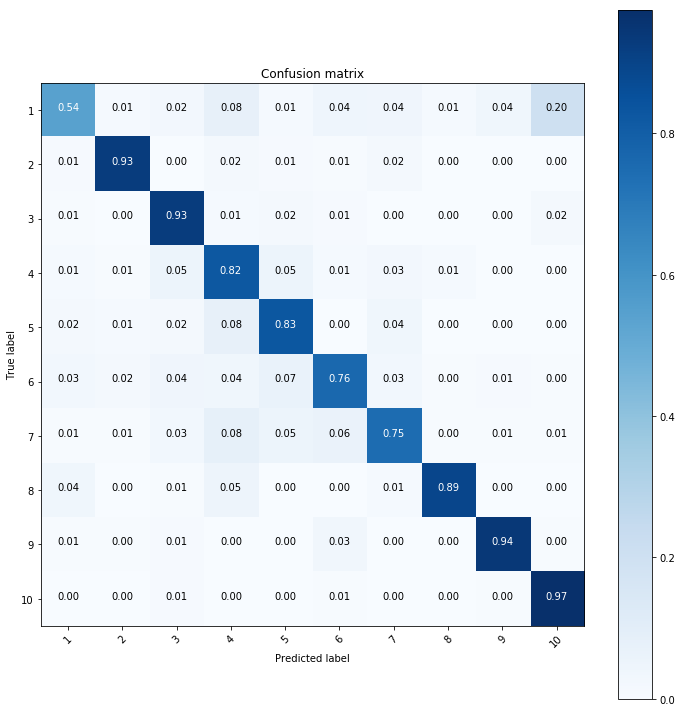

In [24]:
import matplotlib.pyplot as plt

#from sklearn.metrics import confusion_matrix

with torch.no_grad():
    train_preds, real_targets = get_all_preds(ensemble_model, test_generator)

cm = confusion_matrix(real_targets.argmax(dim=1), train_preds.argmax(dim=1))
plt.figure(figsize=(num_classes,num_classes))
classes = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10"]
plot_confusion_matrix(cm, classes)
    

Plot accuracy throughout the day

/home/kfir/.local/lib/python3.6/site-packages/ipykernel_launcher.py:161: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
/home/kfir/.local/lib/python3.6/site-packages/ipykernel_launcher.py:164: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
/home/kfir/.local/lib/python3.6/site-packages/ipykernel_launcher.py:167: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Test accuracy: 84.07974038015763%


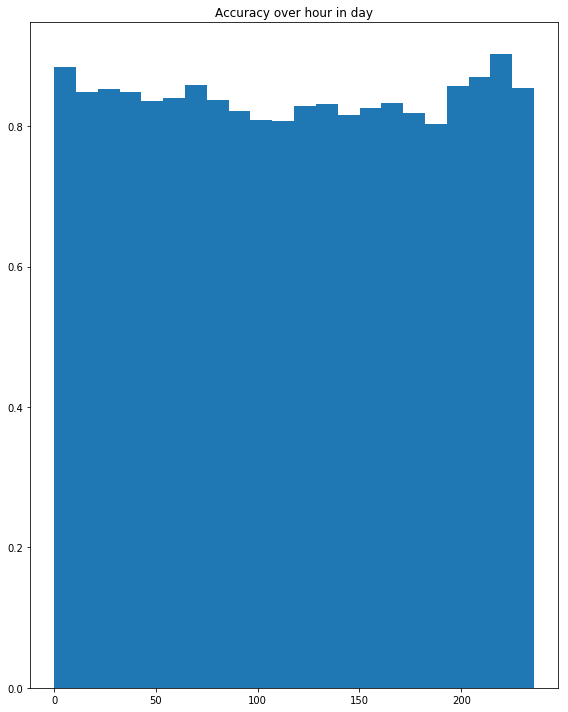

In [33]:
epoch_num = 10
Label_all = []
Output_all = []
timestamp_all = []
with torch.no_grad():                   # operations inside don't track history

    for mono,encoded,hpss,label,timestamp in test_generator:
        if train_on_gpu:
            mono, encoded, hpss, label, timestamp = mono.unsqueeze(1).cuda(), encoded.cuda(), hpss.cuda(), label.cuda(), timestamp.unsqueeze(1).cuda()#dataBatch.unsqueeze(1).float().cuda(), label.cuda()
  
        outP = ensemble_model(mono, encoded, hpss, timestamp)
        
        Label_all.extend(label.argmax(1).tolist())
        Output_all.extend(outP.argmax(1).tolist())
        timestamp_all.extend(timestamp.tolist())

array = (np.array(Label_all) == np.array(Output_all))
timestamp_all = np.array(timestamp_all)

plt.figure(figsize=(8, 10))
timestamp_false = timestamp_all[np.where(array==False)]
counts_false, bins_false = np.histogram(timestamp_false, bins=22)

timestamp_true = timestamp_all[np.where(array==True)]
counts_true, bins_true = np.histogram(timestamp_true, bins=22)
plt.subplot(1, 1, 1)  # 1 line, 2 rows, index nr 1 (first position in the subplot)
plt.hist(bins_true[:-1], bins_true, weights=counts_true/(counts_true+counts_false))
plt.title('Accuracy over hour in day')
plt.tight_layout()

accuracy = (np.array(Label_all) == np.array(Output_all)).sum() / len(Label_all)
print('Test accuracy: {}%'.format(accuracy * 100))